In [97]:
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
import pandas as pd

In [98]:
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period = "max")
del sp500["Dividends"]
del sp500["Stock Splits"]

In [99]:
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2023-10-02 00:00:00-04:00,4284.520020,4300.580078,4260.209961,4288.390137,3938660000
2023-10-03 00:00:00-04:00,4269.750000,4281.149902,4216.450195,4229.450195,3953830000
2023-10-04 00:00:00-04:00,4233.830078,4268.500000,4220.479980,4263.750000,3777600000


<Axes: xlabel='Date'>

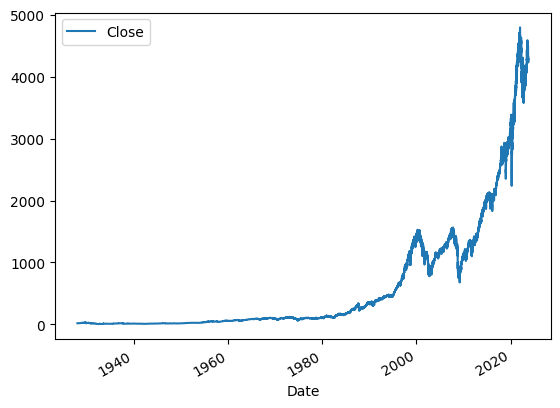

In [100]:
sp500.plot.line(y = "Close", use_index = True)

In [101]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-10-02 00:00:00-04:00,4284.520020,4300.580078,4260.209961,4288.390137,3938660000,4229.450195
2023-10-03 00:00:00-04:00,4269.750000,4281.149902,4216.450195,4229.450195,3953830000,4263.750000
2023-10-04 00:00:00-04:00,4233.830078,4268.500000,4220.479980,4263.750000,3777600000,4258.189941


In [102]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-10-02 00:00:00-04:00,4284.520020,4300.580078,4260.209961,4288.390137,3938660000,4229.450195,0
2023-10-03 00:00:00-04:00,4269.750000,4281.149902,4216.450195,4229.450195,3953830000,4263.750000,1
2023-10-04 00:00:00-04:00,4233.830078,4268.500000,4220.479980,4263.750000,3777600000,4258.189941,0


In [103]:
sp500 = sp500.loc["1998-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1998-01-02 00:00:00-05:00,970.429993,975.039978,965.729980,975.039978,366730000,977.070007,1
1998-01-05 00:00:00-05:00,975.039978,982.630005,969.000000,977.070007,628070000,966.580017,0
1998-01-06 00:00:00-05:00,977.070007,977.070007,962.679993,966.580017,618360000,964.000000,0
1998-01-07 00:00:00-05:00,966.580017,966.580017,952.669983,964.000000,667390000,956.049988,0
1998-01-08 00:00:00-05:00,964.000000,964.000000,955.039978,956.049988,652140000,927.690002,0
...,...,...,...,...,...,...,...
2023-10-02 00:00:00-04:00,4284.520020,4300.580078,4260.209961,4288.390137,3938660000,4229.450195,0
2023-10-03 00:00:00-04:00,4269.750000,4281.149902,4216.450195,4229.450195,3953830000,4263.750000,1
2023-10-04 00:00:00-04:00,4233.830078,4268.500000,4220.479980,4263.750000,3777600000,4258.189941,0


In [128]:
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

In [129]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [130]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

/var/folders/y7/q3m4z5nn3xz3qjh1fqwvrpvh0000gn/T/ipykernel_6985/584939013.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
/var/folders/y7/q3m4z5nn3xz3qjh1fqwvrpvh0000gn/T/ipykernel_6985/584939013.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]


In [131]:
sp500 = sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_ratio_2,Trend_2,Close_ratio_5,Trend_5,Close_ratio_60,Trend_60,Close_ratio_250,Trend_250,Close_ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2005-12-14 00:00:00-05:00,1267.430054,1275.800049,1267.069946,1272.739990,2145520000,1270.939941,0,1.002090,2.0,1.007583,4.0,1.040536,37.0,1.056306,143.0,1.186764,528.0
2005-12-15 00:00:00-05:00,1272.739990,1275.170044,1267.739990,1270.939941,2180590000,1267.319946,0,0.999292,1.0,1.003758,4.0,1.038205,37.0,1.054545,142.0,1.184960,527.0
2005-12-16 00:00:00-05:00,1270.939941,1275.239990,1267.319946,1267.319946,2584190000,1259.920044,0,0.998574,0.0,0.999643,3.0,1.034506,36.0,1.051326,141.0,1.181467,526.0
2005-12-19 00:00:00-05:00,1267.319946,1270.510010,1259.280029,1259.920044,2208810000,1259.619995,0,0.997072,0.0,0.993886,2.0,1.027841,35.0,1.045012,140.0,1.174446,526.0
2005-12-20 00:00:00-05:00,1259.920044,1263.859985,1257.209961,1259.619995,1996690000,1262.790039,1,0.999881,0.0,0.994876,1.0,1.026982,34.0,1.044592,139.0,1.174052,525.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-29 00:00:00-04:00,4328.180176,4333.149902,4274.859863,4288.049805,3865960000,4288.390137,1,0.998643,1.0,0.998464,3.0,0.961631,30.0,1.038452,123.0,1.103394,531.0
2023-10-02 00:00:00-04:00,4284.520020,4300.580078,4260.209961,4288.390137,3938660000,4229.450195,0,1.000040,1.0,1.000829,3.0,0.962105,31.0,1.037921,123.0,1.103098,531.0
2023-10-03 00:00:00-04:00,4269.750000,4281.149902,4216.450195,4229.450195,3953830000,4263.750000,1,0.993080,1.0,0.989109,3.0,0.949521,30.0,1.023222,122.0,1.087585,530.0


In [116]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [137]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [138]:
predictions = backtest(sp500, model, new_predictors)
predictions

,Target,Predictions
Date,,
2015-11-19 00:00:00-05:00,1,0.0
2015-11-20 00:00:00-05:00,0,0.0
2015-11-23 00:00:00-05:00,1,0.0
2015-11-24 00:00:00-05:00,0,0.0
2015-11-25 00:00:00-05:00,1,0.0
...,...,...
2023-09-29 00:00:00-04:00,1,1.0
2023-10-02 00:00:00-04:00,0,1.0
2023-10-03 00:00:00-04:00,1,1.0


In [139]:
predictions["Predictions"].value_counts()

Predictions
0.0    1620
1.0     362
Name: count, dtype: int64

In [140]:
precision_score(predictions["Target"], predictions["Predictions"]) #model Evaluation

0.5386740331491713

In [141]:
predictions["Target"].value_counts() / predictions.shape[0] #BaseLine

Target
1    0.537336
0    0.462664
Name: count, dtype: float64